In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import imghdr
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('drive/MyDrive/flowers/')

Found 2339 files belonging to 3 classes.


In [ ]:
data=data.map(lambda x,y : ((x/255),y))

In [ ]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

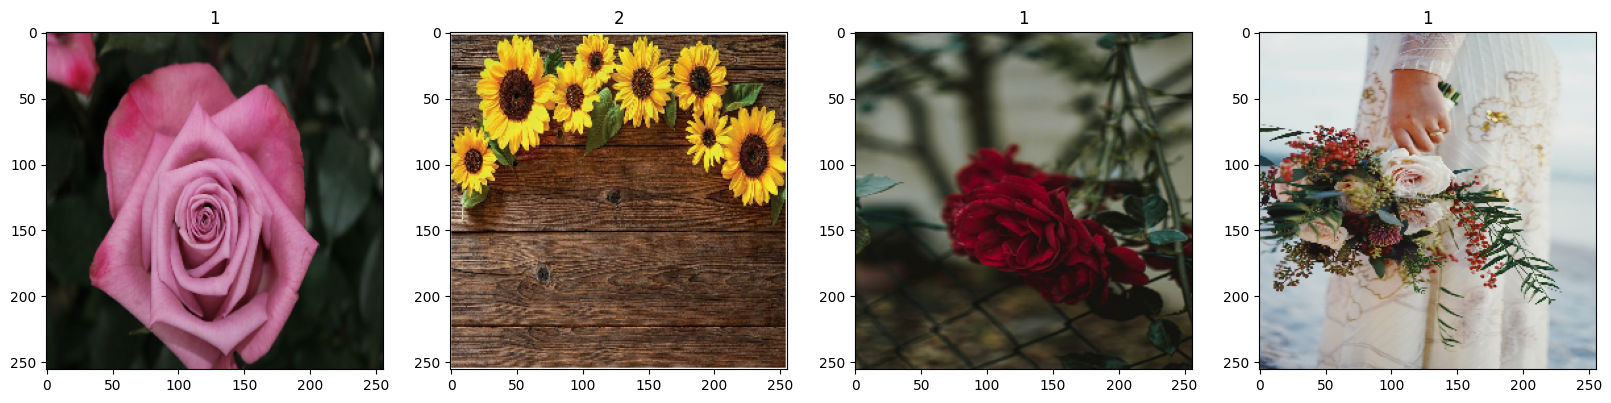

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_size=int(len(data)*0.7)
valid_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [ ]:
train=data.take(train_size)
valid=data.skip(train_size).take(valid_size)
test=data.skip(train_size+valid_size).take(test_size)

In [ ]:
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras import Sequential

In [ ]:
model=Sequential()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
      tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    #Dense Layers Now
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train,validation_data=valid,epochs=10,batch_size=32)

Epoch 1/10
51/51 [==============================] - 461s 9s/step - loss: 1.0718 - accuracy: 0.6023 - val_loss: 0.9428 - val_accuracy: 0.5424
Epoch 2/10
51/51 [==============================] - 127s 2s/step - loss: 0.6946 - accuracy: 0.7132 - val_loss: 0.9793 - val_accuracy: 0.6183
Epoch 3/10
51/51 [==============================] - 101s 2s/step - loss: 0.4933 - accuracy: 0.7904 - val_loss: 1.1071 - val_accuracy: 0.5826
Epoch 4/10
51/51 [==============================] - 127s 2s/step - loss: 0.3290 - accuracy: 0.8725 - val_loss: 0.9649 - val_accuracy: 0.6205
Epoch 5/10
51/51 [==============================] - 128s 2s/step - loss: 0.2239 - accuracy: 0.9130 - val_loss: 1.0722 - val_accuracy: 0.6562
Epoch 6/10
51/51 [==============================] - 127s 2s/step - loss: 0.1968 - accuracy: 0.9387 - val_loss: 1.8349 - val_accuracy: 0.5179
Epoch 7/10
51/51 [==============================] - 128s 2s/step - loss: 0.2295 - accuracy: 0.9234 - val_loss: 0.9766 - val_accuracy: 0.7612
Epoch 8/10
51

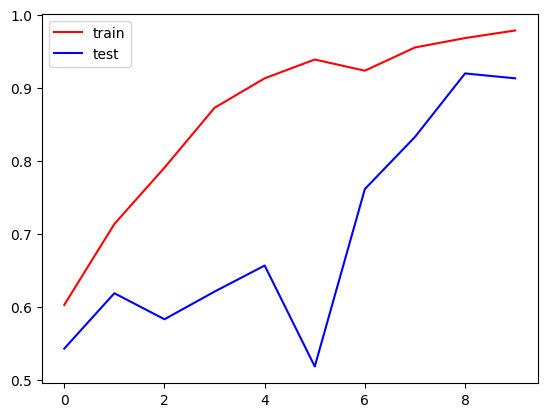

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
def pred(path):
  image=cv2.imread(path)
  plt.imshow(image)
  image=tf.image.resize(image,(256,256))
  pred=model.predict(np.expand_dims(image/255,0))
  val=np.argmax(pred)
  if val==0:
    print('lily')
  elif val==1:
    print('Rose')
  else:
    print('Sunflower')

1/1 [==============================] - 0s 326ms/step
lily


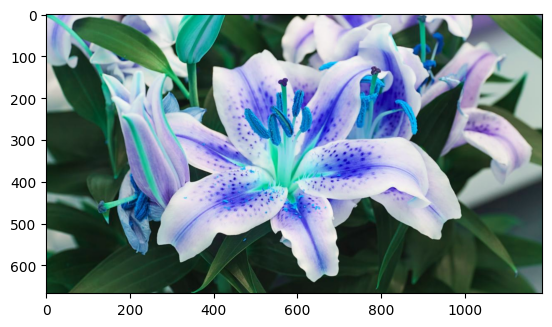

In [ ]:
pred('/content/lily.jpeg')

In [ ]:
model.save('flower_classification.h5')

In [ ]:
model=tf.keras.models.load_model('flower_classification.h5')

In [ ]:
pred('/content/lily.jpeg')

In [ ]:
pred('/content/rose.jpg')

In [ ]:
inception=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
inception.summary()

In [ ]:
inception.trainable=False

In [ ]:
trans_model=tf.keras.Sequential(
    [
        inception,
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(64,activation='relu'),
     tf.keras.layers.Dense(32,activation='relu'),
     tf.keras.layers.Dense(4,activation='softmax')
    ]
)

In [ ]:
trans_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=trans_model.fit(train,validation_data=valid,epochs=15,batch_size=32)

Epoch 1/15
51/51 [==============================] - 101s 2s/step - loss: 0.1697 - accuracy: 0.9418 - val_loss: 0.3701 - val_accuracy: 0.8862
Epoch 2/15
51/51 [==============================] - 128s 2s/step - loss: 0.0668 - accuracy: 0.9749 - val_loss: 0.1813 - val_accuracy: 0.9487
Epoch 3/15
51/51 [==============================] - 128s 2s/step - loss: 0.0358 - accuracy: 0.9853 - val_loss: 0.1079 - val_accuracy: 0.9688
Epoch 4/15
51/51 [==============================] - 130s 2s/step - loss: 0.0099 - accuracy: 0.9982 - val_loss: 0.1034 - val_accuracy: 0.9732
Epoch 5/15
51/51 [==============================] - 128s 2s/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0830 - val_accuracy: 0.9777
Epoch 6/15
51/51 [==============================] - 128s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9732
Epoch 7/15
51/51 [==============================] - 101s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9710
Epoch 8/15
51

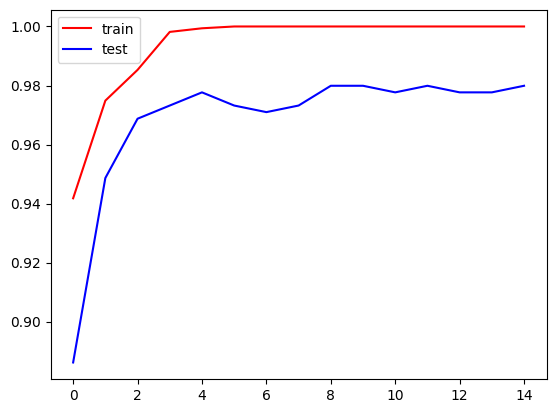

In [ ]:
plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
trans_model.save('tra.h5')